In [2]:
# Load libraries
import pandas as pd
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
df = pd.read_csv("./datasets/diabetes.csv")
df_name=df.columns

X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])



C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [3]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
SEED = 7
np.random.seed(SEED)
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    return basedModels
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame
basedLineScore = ScoreDataFrame(names,results)
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

LR: 0.776044 (0.061919)
LDA: 0.767362 (0.069908)
KNN: 0.697913 (0.096512)
CART: 0.701210 (0.068435)
NB: 0.744586 (0.055160)
SVM: 0.749788 (0.072746)
AB: 0.753448 (0.052866)
GBM: 0.748276 (0.062951)
RF: 0.751724 (0.075342)
ET: 0.737780 (0.071144)


standardLR: 0.770871 (0.066918)
standardLDA: 0.767362 (0.069908)
standardKNN: 0.718814 (0.076470)
standardCART: 0.706413 (0.082978)
standardNB: 0.744586 (0.055160)
standardSVM: 0.755172 (0.069258)
standardAB: 0.753448 (0.052866)
standardGBM: 0.753448 (0.063819)
standardRF: 0.744707 (0.080613)
standardET: 0.734180 (0.073962)


minmaxLR: 0.767332 (0.076835)
minmaxLDA: 0.767362 (0.069908)
minmaxKNN: 0.715457 (0.067083)
minmaxCART: 0.694344 (0.075304)
minmaxNB: 0.744586 (0.055160)
minmaxSVM: 0.755142 (0.054727)
minmaxAB: 0.751724 (0.056744)
minmaxGBM: 0.748215 (0.066452)
minmaxRF: 0.746461 (0.079165)
minmaxET: 0.742982 (0.078897)


,Model,Score,Model,Score,Model,Score
0,LR,0.7760,standardLR,0.7709,minmaxLR,0.7673
1,LDA,0.7674,standardLDA,0.7674,minmaxLDA,0.7674
2,KNN,0.6979,standardKNN,0.7188,minmaxKNN,0.7155
3,CART,0.7012,standardCART,0.7064,minmaxCART,0.6943
4,NB,0.7446,standardNB,0.7446,minmaxNB,0.7446
5,SVM,0.7498,standardSVM,0.7552,minmaxSVM,0.7551
6,AB,0.7534,standardAB,0.7534,minmaxAB,0.7517
7,GBM,0.7483,standardGBM,0.7534,minmaxGBM,0.7482
8,RF,0.7517,standardRF,0.7447,minmaxRF,0.7465
9,ET,0.7378,standardET,0.7342,minmaxET,0.7430


In [11]:
df_t = df.copy()
df_t_name = df_t.columns
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out
df_clean = df.copy()
for i in range(0, len(df_t.columns)):
    df_clean = TurkyOutliers(df_clean, df_name[i], True)
display(df_t.shape)
display(df_clean.shape)


Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.
Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.
Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.
Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.
Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.
Number of outliers (inc duplicates): 10 and out

(768, 9)

(636, 9)

In [12]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])



In [13]:
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred,best_model
    
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred,best_model

model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
LR_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR,model_lr = LR_RandSearch.BestModelPridict(X_test)
# Printing the test accuracy for Gradient Boosting Classifier
print("The test accuracy score of LogisticRegression is ",
      accuracy_score(y_test, Prediction_LR), "f1 :",  f1_score(y_test, Prediction_LR))
model_KNN = KNeighborsClassifier()
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))
neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)
KNN_GridSearch = GridSearch(X_train,y_train,model_KNN,param_grid)
Prediction_KNN,knn_model = KNN_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_KNN).mean(),7),"f1",f1_score(y_test,Prediction_KNN))
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()
SVC_GridSearch = GridSearch(X_train,y_train,model_SVC,param_grid)
Prediction_SVC,svc_model = SVC_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_SVC).mean(),7),"f1",f1_score(y_test,Prediction_SVC))

max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)
model_CART = DecisionTreeClassifier()
CART_GridSearch = RandomSearch(X_train,y_train,model_CART,param_grid)
Prediction_CART,dt_model = CART_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((y_test == Prediction_CART).mean(),7),"f1",f1_score(y_test,Prediction_CART))


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators':[50,100,200,400]
        }
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
xgb_classifier = xgb.XGBClassifier()
model = RandomSearch(X_train,y_train,xgb_classifier,params)


y_pred,xgb_model = model.BestModelPridict(X_test)


# Printing the test accuracy for Gradient Boosting Classifier
print("The test accuracy score of Gradient Boosting Classifier is ",
      accuracy_score(y_test, y_pred), "f1 :",  f1_score(y_test, y_pred))

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
random_forest= RandomForestClassifier(random_state=42)
random_forest_gs = GridSearch(X_train,y_train,random_forest,param_grid)
random_forest_preds,model_rf = random_forest_gs.BestModelPridict(X_test)
# Printing the test accuracy for Gradient Boosting Classifier
print("The test accuracy score of random forest is ",
      accuracy_score(y_test, random_forest_preds), "f1 :",  f1_score(y_test, random_forest_preds))

C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


460 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
460 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

Best: 0.786903 using {'C': 3.730229437354635, 'penalty': 'l2'}
The test accuracy score of LogisticRegression is  0.828125 f1 : 0.6857142857142857
Best: 0.809558 using {'n_neighbors': 15}
prediction on test set is: 0.828125 f1 0.7027027027027027
Best: 0.792075 using {'C': 0.1, 'kernel': 'poly'}
prediction on test set is: 0.84375 f1 0.7058823529411764
Best: 0.776286 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3}
prediction on test set is: 0.78125 f1 0.5333333333333333
Best: 0.793829 using {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 1.5, 'colsample_bytree': 0.6}
The test accuracy score of Gradient Boosting Classifier is  0.78125 f1 : 0.6666666666666666
Best: 0.793860 using {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
The test accuracy score of random forest is  0.8125 f1 : 0.6666666666666665


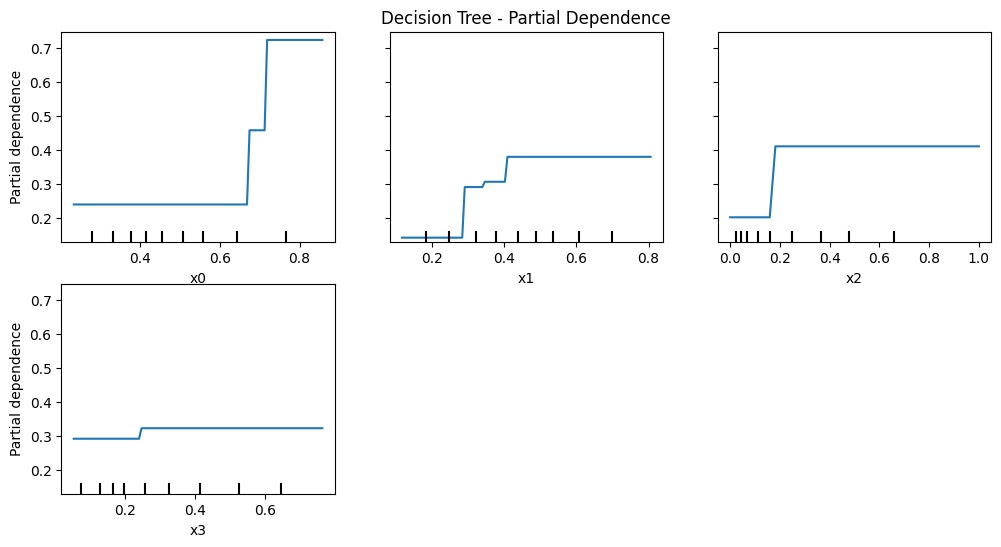

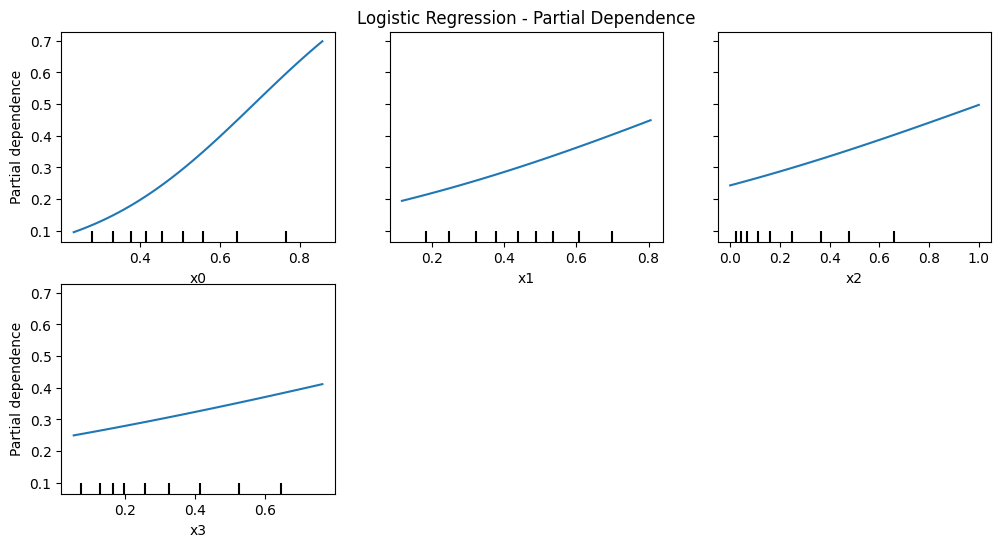

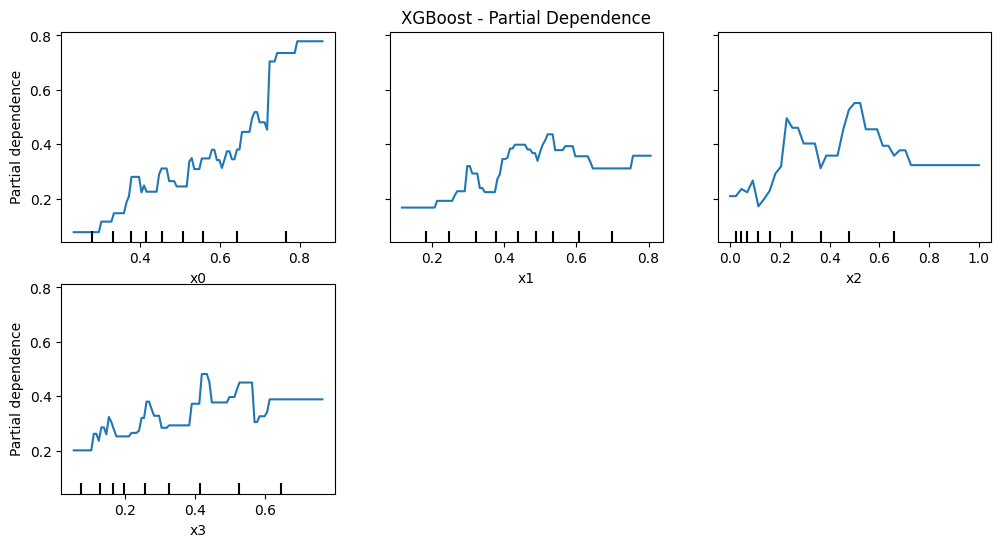

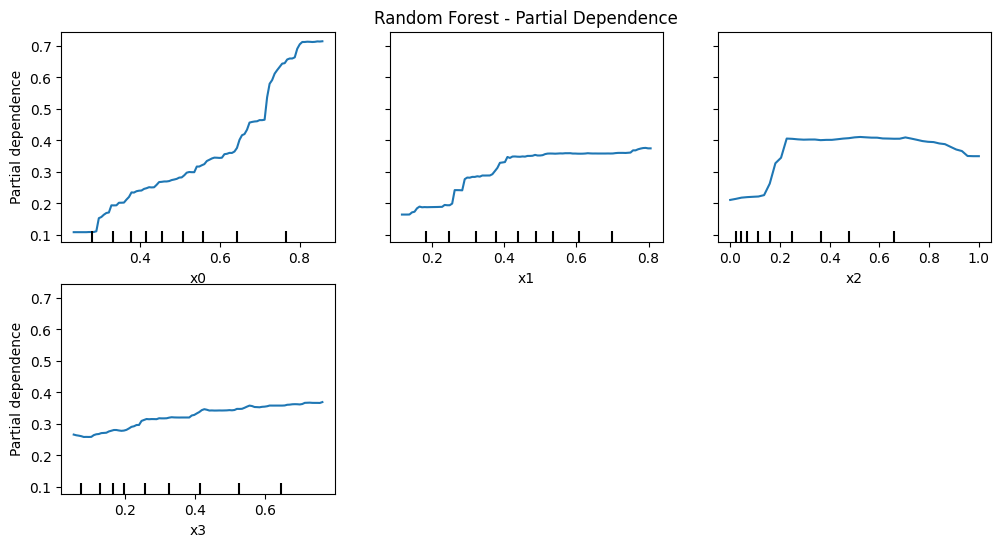

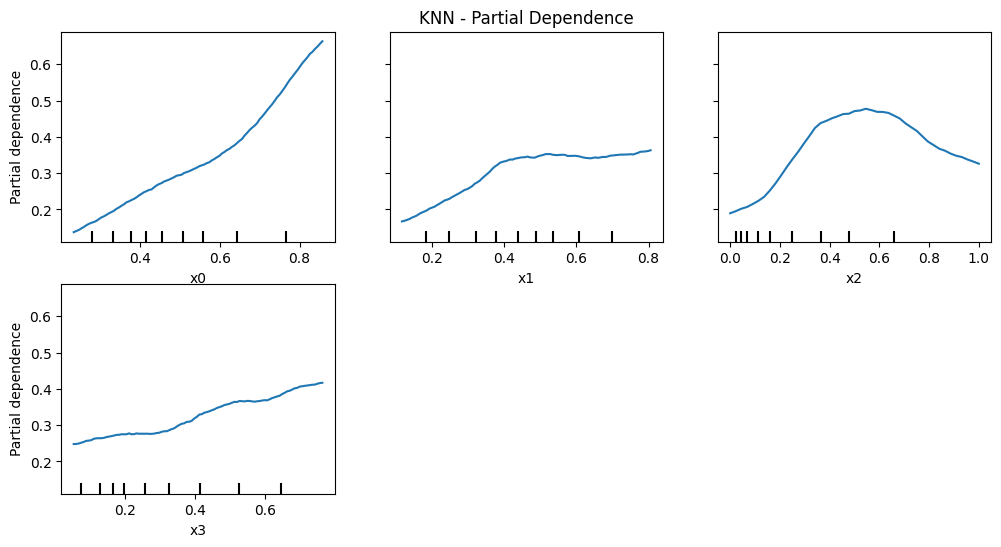

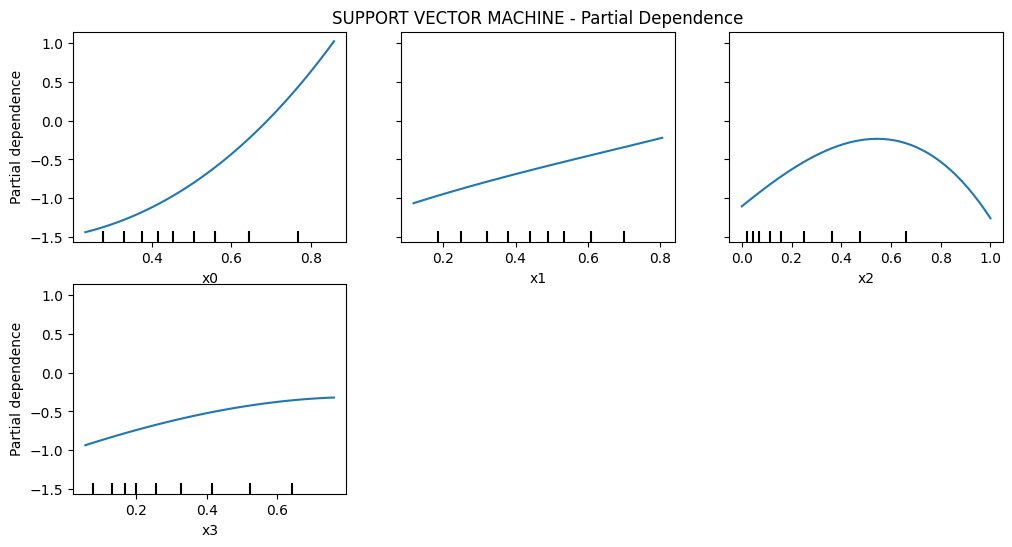

ValueError: shapes (636,4) and (636,) not aligned: 4 (dim 1) != 636 (dim 0)

In [14]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
feature_names = [0, 1, 2, 3]
# Decision Tree
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree - Partial Dependence")
PartialDependenceDisplay.from_estimator(dt_model, X_train, features=feature_names, ax=ax)
plt.show()

# Logistic Regression
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Logistic Regression - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    model_lr, X_train, features=feature_names, ax=ax)
plt.show()

# SVM - Partial Dependence doesn't directly apply to SVM; consider other visualization methods
# SVM doesn't inherently support partial dependence plots as decision tree-based models do.

# XGBoost
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("XGBoost - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    xgb_model, X_train, features=feature_names, ax=ax)
plt.show()

# Random Forest
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    model_rf, X_train, features=feature_names, ax=ax)
plt.show()
# KNN
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("KNN - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    knn_model, X_train, features=feature_names, ax=ax)
plt.show()
# SVM
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("SUPPORT VECTOR MACHINE - Partial Dependence")
PartialDependenceDisplay.from_estimator(
    svc_model, X_train, features=feature_names, ax=ax)
plt.show()
from scipy.stats import pearsonr
r, p_value = pearsonr(X, Y)

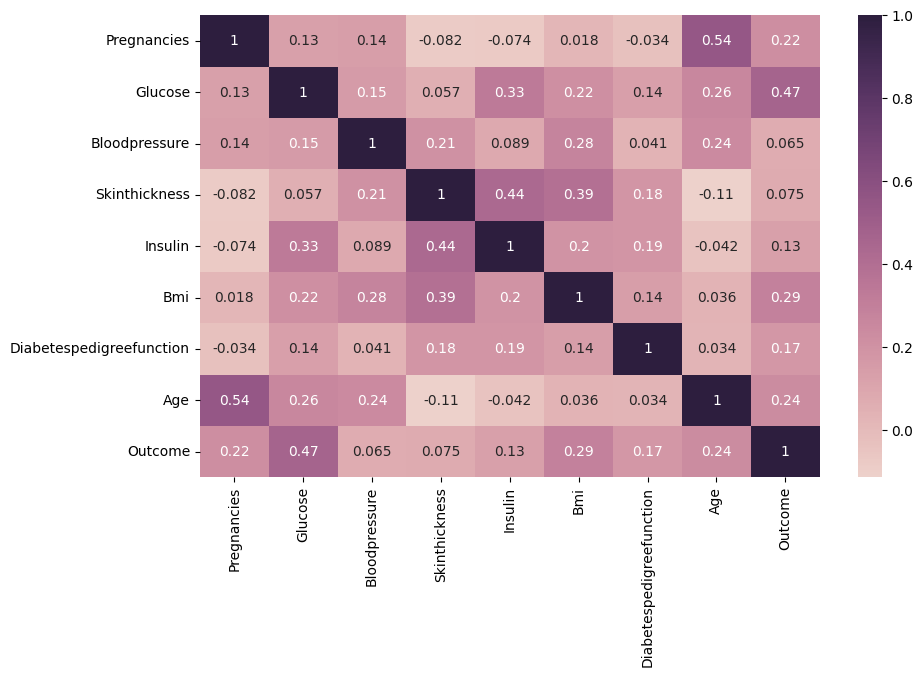

In [15]:
import seaborn as sns
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)